**First we import all the necessary library we're going to use in the code**

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

#  CODE PROJECT 

Our job in order to promote the performance of our company's recommendation sytem begins by studying and analysing all the datasets.

# CUSTOMERS

1. We begin by importing our customer dataset, which includes a unique identifier for each customer along with their age, newsletter subscription status (1 for subscribed, 0 for not subscribed), and membership in a special club. To gain an understanding of the data, we print the first five items and use the shape function to determine the overall size of the dataset.

In [3]:
customers = pd.read_csv("recsys_customers.csv")
customers.head()

,customer_id,fashion_news,club_member,age
0,0,1,1,44.0
1,1,1,1,33.0
2,2,0,0,29.0
3,3,0,0,21.0
4,4,0,0,23.0


knowing how big the file is 

In [4]:
customers.shape

(41253, 4)

One of our tasks is to locate columns with potentially missing values (NaN) in order to properly handle them.

In [5]:
customers.isnull().sum()

customer_id       0
fashion_news      0
club_member       0
age             133
dtype: int64

among the 4 columns, only the age column has missing values. To evaluate the significance of these null values in relation to the entire dataset, we can compute their weight as a proportion of the dataset's size.

In [6]:
null_percentage= customers['age'].isnull().sum()/ len(customers)
print('The null percentage of age is: ' + str(null_percentage))

The null percentage of age is: 0.0032240079509369014


The percentage of null values is fairly low, at approximately 0.32%. At this point, we can choose between two approaches: deleting all rows with null values in the age column, or replacing the null cells with the most common age values. 

We opted to replace all NaN values with the most frequent age value, which is 26.

In [7]:
customers.age.mode()

0    26.0
Name: age, dtype: float64

In [8]:
mode_age = customers['age'].mode()[0]
customers['age'] = customers['age'].fillna(mode_age)

3. To make our data more easily understood and interpreted, we will convert the age column from a float to an integer data type.

In [9]:
customers["age"] = customers["age"].apply(int)
customers.head()

,customer_id,fashion_news,club_member,age
0,0,1,1,44
1,1,1,1,33
2,2,0,0,29
3,3,0,0,21
4,4,0,0,23


4. To gain a deeper understanding of our data, we will divide the customers into 5 age groups based on the range of their ages. To do this, we will first determine the minimum and maximum age values and then use these values to create our "clusters".

In [10]:
print("The lowest age recorded is: " + str(min(customers["age"])))
print("The highest age recorded is: " + str(max(customers["age"])))

The lowest age recorded is: 16
The highest age recorded is: 91


We are adding a new column to the original table that assigns each customer to their respective age category.

In [18]:
containers = [1, 23, 30, 40, 50, 60]
collections = ['1-23', '24-29', '30-39','40-49','50+']

customers['age_group'] = pd.cut(customers['age'], containers, labels=collections, include_lowest=True)
customers

,customer_id,fashion_news,club_member,age,age_group
0,0,1,1,44,40-49
1,1,1,1,33,30-39
2,2,0,0,29,24-29
3,3,0,0,21,1-23
4,4,0,0,23,1-23
...,...,...,...,...,...
41248,41248,1,1,33,30-39
41249,41249,0,0,25,24-29
41250,41250,1,1,20,1-23
41251,41251,1,1,29,24-29


After categorizing each customer, we can use the group by function to count how many members belong to each category. The sum of the number of members in each category should equal the length of the dataset.

In [ ]:
count_age_group = customers.groupby('age_group').size()
count_age_group

age_group
3-23      6747
24-29    13718
30-54     7348
50-68     6501
60+       5655
dtype: int64

5. Now that we have counted the number of members in each age group, we can create a barplot to visualize the heterogeneity of our dataset. As expected, there are significantly more younger customers compared to older ones.

In [ ]:
count_age_group_df = pd.DataFrame(count_age_group).reset_index()
count_age_group_df.columns = ['Age Group', 'Count']
count_age_group_df

,Age Group,Count
0,3-23,6747
1,24-29,13718
2,30-54,7348
3,50-68,6501
4,60+,5655


6. To better understand the age distribution of our data, we can create a plot. Our data shows that there are significantly more people under 50 years old compared to those over 50. In fact, the percentage of people below 50 years old is 85.2%. We can use this information to create a plot that illustrates the age distribution in our dataset.

In [ ]:
age_groups = ['Under 50', 'Over 50']
people_under_50 = count_age_group[0] + count_age_group[1] + count_age_group[2]
people_over_50 = count_age_group[3] + count_age_group[4]
customer_counts = [people_under_50, people_over_50]

total_number_customers = sum(customer_counts)
percentage_under_50 = round((people_under_50 / total_number_customers) * 100, 2)
print(f'The percentage of people under 50 years old is: {percentage_under_50}%')

The percentage of people under 50 years old is: 69.59%


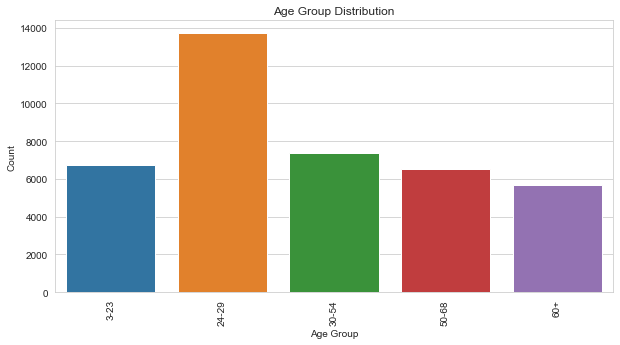

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x='Age Group', y='Count', data=count_age_group_df)
plt.xticks(rotation=90)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.show()

7.  In order to get a better understanding of our customer base, we should also track how many people in each age group have joined the club and how many have activated the fashion news feature. The 'club member' and 'fashion news' columns in our data have two possible values: 1 if the customer is subscribed, or 0 if they are not.

We know that both columns of 'club member' and 'fashion news' have two possible values:
- 1 if the customer is subscribed to the club member or to fashion news
- 0 if the customer is not subscribed

#### **membership Club**

In [ ]:
from collections import Counter

total_club = Counter(customers['club_member'])
total_club

Counter({1: 17975, 0: 23278})

To analyze the subscription status of our customers, we can create a DataFrame that includes two columns: one for customers who are subscribed, and one for those who are not. We can then use this DataFrame to count the number of customers in each group.

In [ ]:
total_club_df = pd.DataFrame([total_club]).T.reset_index()
total_club_df.columns = ['Premium Club (1=yes, 0=no)', 'Count']
total_club_df

,"Premium Club (1=yes, 0=no)",Count
0,1,17975
1,0,23278


"Although the graph of our current DataFrame provides some information, it is not very useful because we cannot see which age group each customer belongs to. To get a more detailed understanding of our customer base, we may want to create a new DataFrame that categorizes customers as either subscribed or not subscribed, and also groups them by age. This would allow us to capture more information and gain a deeper insight into our customer data.

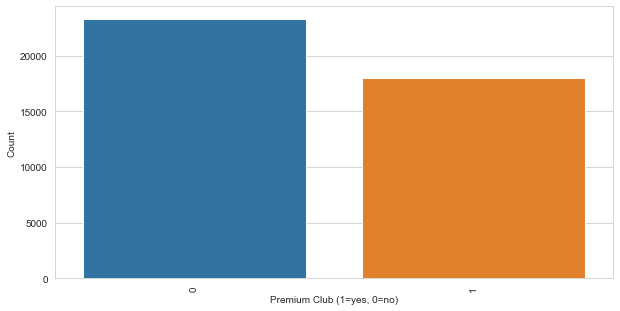

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Premium Club (1=yes, 0=no)', y='Count', data=total_club_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
club_membership_df = customers.groupby(['age_group', 'club_member']).count().reset_index()
club_membership_df = club_membership_df.drop(columns=['fashion_news', 'age'])
club_membership_df.columns = ['age_group', 'club_member', 'count']
club_membership_df

,age_group,club_member,count
0,3-23,0,3533
1,3-23,1,3214
2,24-29,0,8506
3,24-29,1,5212
4,30-54,0,4320
5,30-54,1,3028
6,50-68,0,3533
7,50-68,1,2968
8,60+,0,2849
9,60+,1,2806


On average there are more people which are not subscribed to the premium club. However, most of the people who are subscribed are youngsters. For what concerns elderly people, their percentage of influence in the dataset is very small.

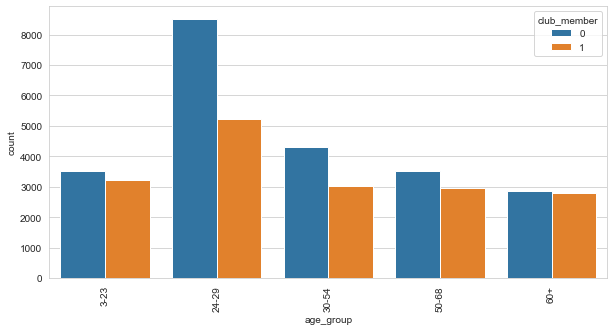

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='age_group', y='count', hue='club_member', data=club_membership_df)
plt.xticks(rotation=90)
plt.show()

#### **Fashion news**

"In general, there are more people who are not subscribed to the premium club. However, the majority of subscribers are young. Elderly people make up a small percentage of our customer base

In [ ]:
from collections import Counter
general_fashion = Counter(customers['fashion_news'])

general_fashion_df = pd.DataFrame([general_fashion]).T.reset_index()
general_fashion_df.columns = ['Fashion News (1=yes, 0=no)', 'Count']
general_fashion_df

,"Fashion News (1=yes, 0=no)",Count
0,1,18213
1,0,23040


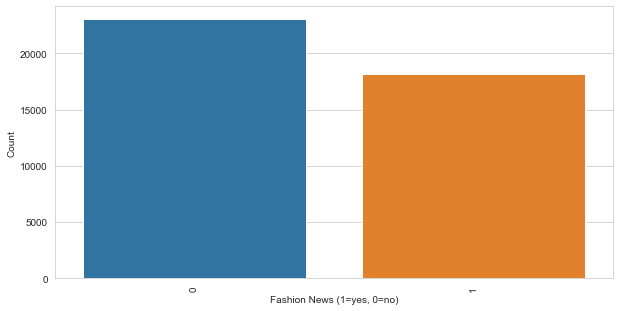

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Fashion News (1=yes, 0=no)', y='Count', data=general_fashion_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
news_fashion_df = customers.groupby(['age_group', 'fashion_news']).count().reset_index()
news_fashion_df = news_fashion_df.drop(columns=['club_member', 'age'])
news_fashion_df.columns = ['age_group', 'fashion_news', 'count']
news_fashion_df

,age_group,fashion_news,count
0,3-23,0,3461
1,3-23,1,3286
2,24-29,0,8440
3,24-29,1,5278
4,30-54,0,4284
5,30-54,1,3064
6,50-68,0,3502
7,50-68,1,2999
8,60+,0,2823
9,60+,1,2832


We can see from the graph below that the vast majority of people who are interested in fashion news are young people. However, compared to younger people, the likelihood that a person over 50 is connected to fashion news is higher.

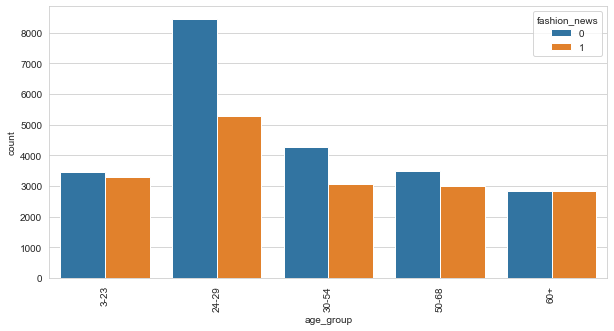

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='age_group', y='count', hue='fashion_news', data=news_fashion_df)
plt.xticks(rotation=90)
plt.show()

To create a recommendation system, we can use the following information from the customers' dataset:

The age of the customers, with a focus on the proportion of customers who are over 50, as they are more likely to be interested in fashion news and club memberships.
The general preferences of the customers, with a focus on the proportion of customers who are not interested in fashion news and club memberships.
Additionally, it may be helpful to consider other factors that could influence a customer's preferences, such as their gender, income level, or location. By using this information, we can create a recommendation system that takes into account the specific characteristics and preferences of our customer base.

# ARTICLES

The second stage of our data analysis will involve looking at the many products that our business sells. The ultimate goal is to be able to recognize when various articles are comparable or dissimilar and, consequently, when to advise one of them based on prior orders. Let's look at the following dataset:Let's take a look to this dataset:

In [ ]:
myarticles = pd.read_csv("recsys_articles.csv")
myarticles.head()

,article_id,prod_name,product_type,product_type_name,product_group_name,colour_group,colour_group_name,perceived_colour_value,perceived_colour_value_name,perceived_colour_master,...,department,department_name,index,index_name,index_group,index_group_name,section,section_name,garment_group,garment_group_name
0,0,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,9,Black,4,Dark,5,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
1,1,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,9,Black,4,Dark,5,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
2,2,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,9,Black,4,Dark,5,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
3,3,200 den 1p Tights,304,Underwear Tights,Socks & Tights,9,Black,4,Dark,5,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
4,4,Control Top 50 den 1p Tights,273,Leggings/Tights,Garment Lower body,9,Black,4,Dark,5,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights


As is clear, this dataset has a more intricate structure than the one we previously examined, but we can undoubtedly discard some columns. Two columns are used to represent each category; therefore, we can only use one and leave the other out. For instance, each product has two variables: "product type," which contains the product's ID code, and "product type name," which has the complete product name. As a result, we can decide which factors to take into account and which to ignore.

1. We would like to determine how many values are null, much like we did for customers. Fortunately, there are no null values this time.

In [ ]:
myarticles.isnull().sum()

article_id                      0
prod_name                       0
product_type                    0
product_type_name               0
product_group_name              0
colour_group                    0
colour_group_name               0
perceived_colour_value          0
perceived_colour_value_name     0
perceived_colour_master         0
perceived_colour_master_name    0
department                      0
department_name                 0
index                           0
index_name                      0
index_group                     0
index_group_name                0
section                         0
section_name                    0
garment_group                   0
garment_group_name              0
dtype: int64

Despite the absence of Null values, data manipulation has allowed us to see that there are some Unknown values that we want to remove.

In [ ]:
nulls = myarticles.loc[myarticles['product_group_name'] == 'Unknown']
print(f'The Unknown percentage items is: {round((len(nulls) / len(myarticles)*100), 2)}%')

The Unknown percentage items is: 1.03%


In [ ]:
myarticles2 = myarticles[myarticles.product_type != -1] #dataframe with all my articles except unknowns

2.  Starting with the classification of articles into types, we can now group our articles in several ways.

#### **TYPES**

We'd like to see how our products are divided into categories. We examine how these categories are organized and count the number of articles in each. We begin with types.

In [ ]:
article_type_count = Counter(myarticles['product_type_name'])
article_type_count_df = pd.DataFrame([article_type_count]).T.reset_index()
article_type_count_df.columns = ['Type', 'Count']
article_type_count_df = article_type_count_df.sort_values(by='Count', ascending=False) #We sort the dataframe in order to see the biggest types without any code
article_type_count_df

,Type,Count
18,Trousers,972
3,Sweater,635
11,Dress,578
21,Top,422
17,T-shirt,382
...,...,...
30,Braces,1
78,Hairband,1
79,Flat shoes,1
31,Nipple covers,1


According to the dataframe, the product type with the most articles is 'Trousers,' with 972 models.

our graph will looks like:

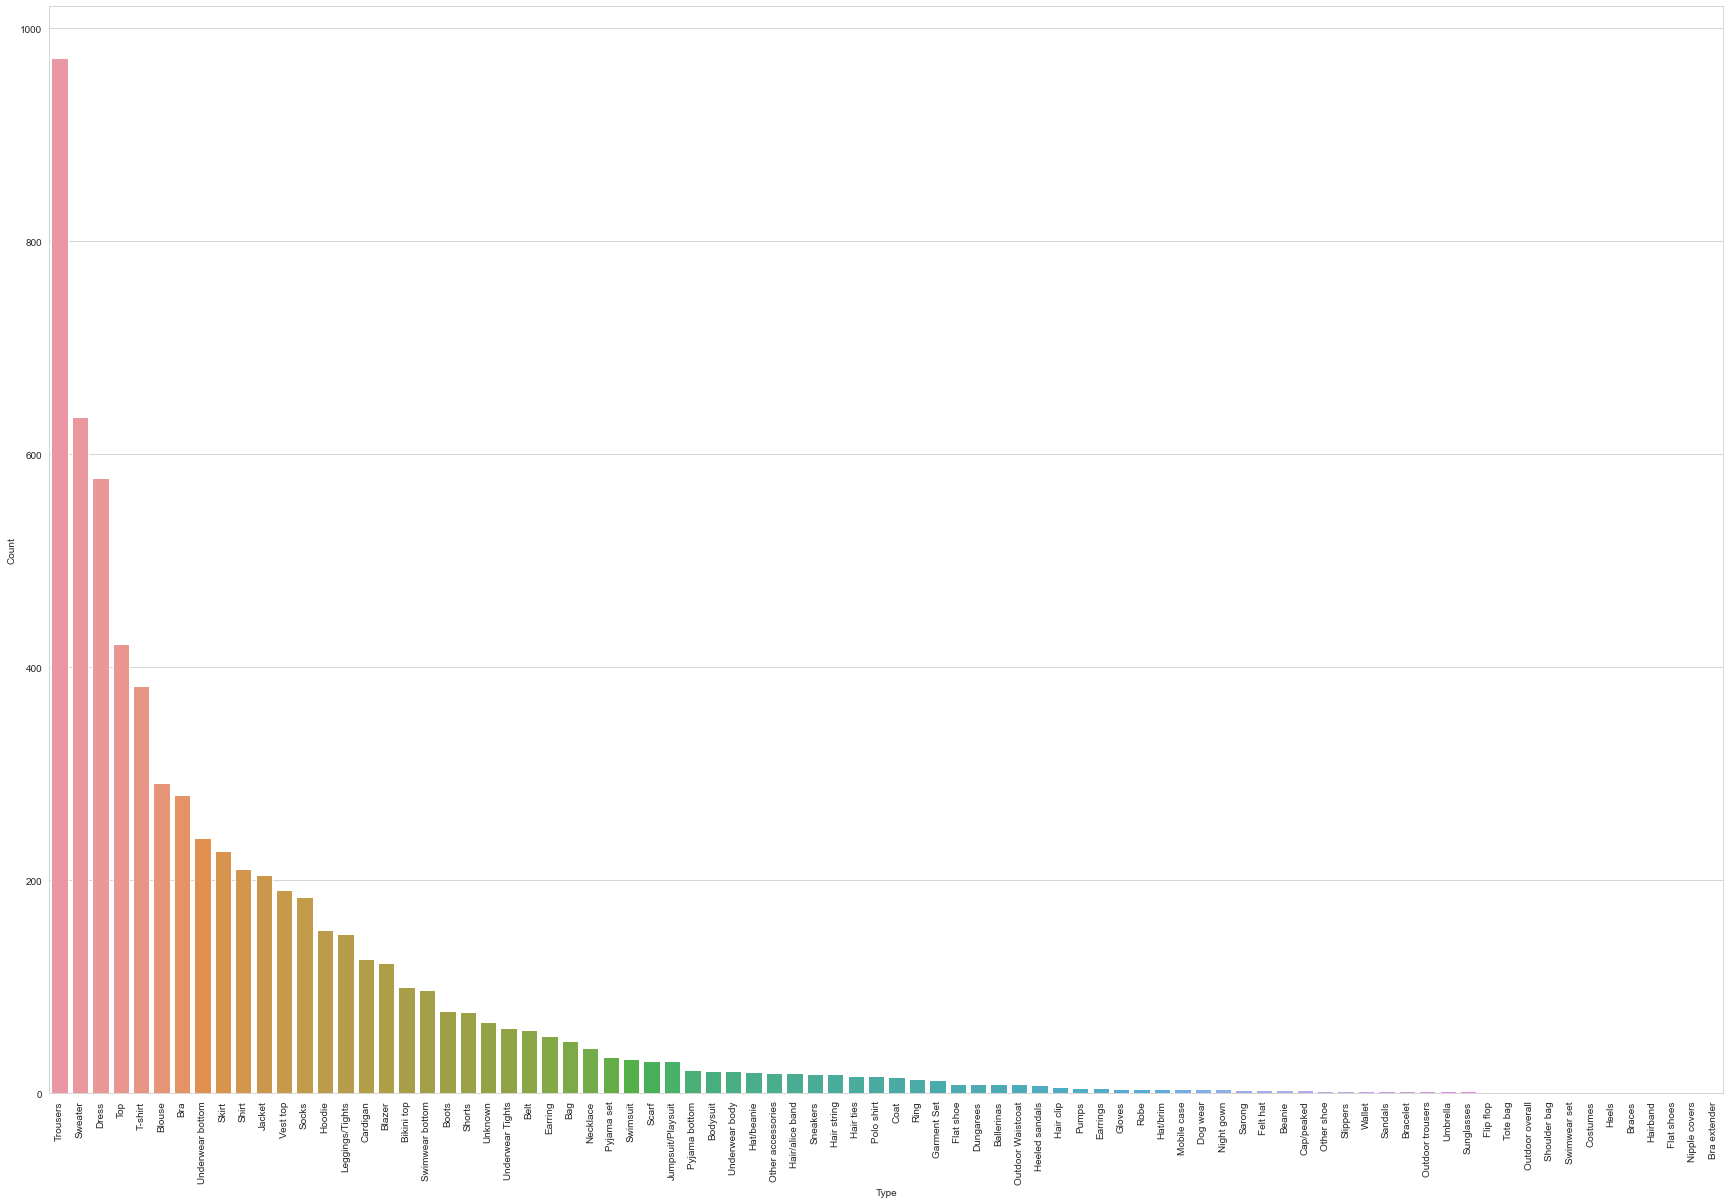

In [ ]:
plt.figure(figsize=(30,20))
sns.barplot(x='Type', y='Count', data=article_type_count_df)
plt.xticks(rotation=90)
plt.show()

The plot beneath is useful, but it is also far too caothic (82 categories are too many). A fantastic solution is to group our categories (types) into larger categories, which are represented by groups.

#### **GROUPS**

In [ ]:
group_number_article = Counter(myarticles['product_group_name'])
group_number_article = pd.DataFrame([group_number_article]).T.reset_index()
group_number_article.columns = ['Group', 'Count']
group_number_article_df = group_number_article.sort_values(by='Count', ascending=False)
group_number_article_df

,Group,Count
3,Garment Upper body,2799
1,Garment Lower body,1428
7,Garment Full body,632
4,Underwear,547
6,Accessories,378
0,Socks & Tights,245
9,Swimwear,233
8,Shoes,135
5,Unknown,67
10,Nightwear,60


Now, we can see all of the classification for groups in one place, with the top item being Garment Upper body, which has 2799 different articles. We have a simpler plot here where we can see all of the categories right away. As a result, the data is more interpretable and useful for our purposes. We plot our results once more:

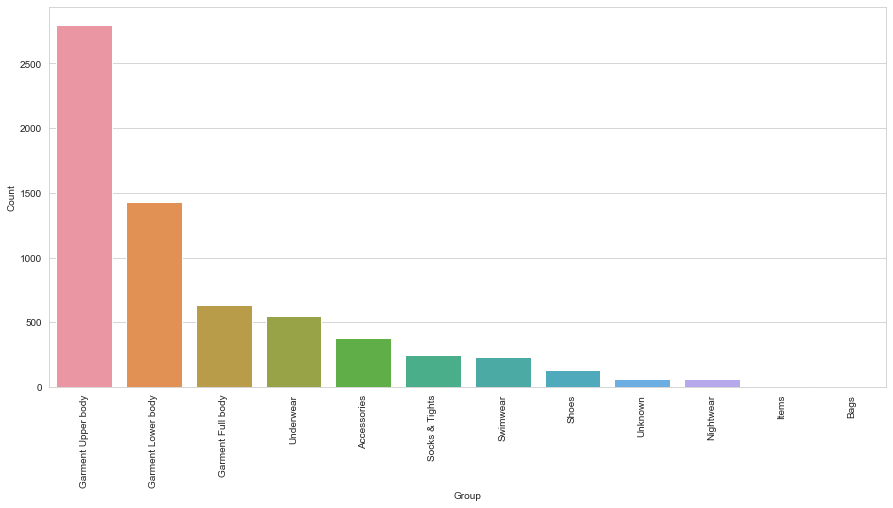

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x='Group', y='Count', data=group_number_article_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
count_department = Counter(myarticles['department_name'])
count_department_df = pd.DataFrame([count_department]).T.reset_index()
count_department_df.columns = ['Department', 'Count']
count_department_df = count_department_df.sort_values(by='Count', ascending=False)


In [ ]:
group_of_index = Counter(myarticles['index_group_name'])
group_of_index_df = pd.DataFrame([group_of_index]).T.reset_index()
group_of_index_df.columns = ['Index Group', 'Count']
group_of_index_df = group_of_index_df.sort_values(by='Count', ascending=False)

In [ ]:
num_of_section = Counter(myarticles['section_name'])
num_of_section_df = pd.DataFrame([num_of_section]).T.reset_index()
num_of_section_df.columns = ['Section', 'Count']
section_count_df = num_of_section_df.sort_values(by='Count', ascending=False)

In [ ]:
garment_team = Counter(myarticles['garment_group'])
garment_team_df = pd.DataFrame([garment_team]).T.reset_index()
garment_team_df.columns = ['Garment Group', 'Count']
garment_team_df = garment_team_df.sort_values(by='Count', ascending=False)

#### **COLOURS**

To evaluate the colour of the articles there are several measures: colour_group, perceived_colour_value and perceived_colour_master. For our analysis we are going to consider just the perceived_colour_master because it is a good compromise between making a model having too large scale and doing overfitting. In fact, perceived_colour_value has not enough values (only 7) and colour_group has too many of them making the model too precise.

For our analysis, we will use the perceived_colour_master to evaluate the color of the articles because it strikes a good balance between having a model with too large a scale and overfitting. We are choosing to use perceived_colour_master instead of perceived_colour_value because it has a sufficient number of values, while using colour_group would result in a model that is too precise due to the large number of values.

In [ ]:
from collections import Counter
my_article_colour = Counter(myarticles['perceived_colour_master_name'])
del my_article_colour['Unknown']
del my_article_colour['undefined']

my_article_colour_df = pd.DataFrame([my_article_colour]).T.reset_index()
my_article_colour_df.columns = ['Colour', 'Count']
my_article_colour_df = my_article_colour_df.sort_values(by='Colour')
my_article_colour_df

,Colour,Count
3,Beige,547
0,Black,2134
1,Blue,726
5,Brown,156
13,Green,176
2,Grey,526
7,Khaki green,218
10,Lilac Purple,108
9,Metal,116
6,Mole,177


In [ ]:
#create dataframe and check for its size
from collections import Counter
my_article_colour2 = Counter(myarticles['colour_group'])

article_colour2_df = pd.DataFrame([my_article_colour2]).T.reset_index()
article_colour2_df.columns = ['Colour', 'Count']
article_colour2_df = article_colour2_df.sort_values(by='Colour')

In [ ]:
#create dataframe and check for its size
from collections import Counter
my_article_colour3 = Counter(myarticles['perceived_colour_value'])

my_article_colour3_df = pd.DataFrame([my_article_colour3]).T.reset_index()
my_article_colour3_df.columns = ['Colour', 'Count']
my_article_colour3_df = my_article_colour3_df.sort_values(by='Colour')

# TRANSACTIONS

The last dataset we will be examining is "recsys_transactions.csv", which contains information about transactions made by customers. This dataset includes the date of purchase, the customer's identification number, and the identification number of the product purchased. It is possible for a single customer to make multiple purchases. Now, let's take a closer look at this dataset.

In [ ]:
purchase_raws = pd.read_csv("recsys_transactions.csv")
purchase_raws.head()

,t_dat,customer_id,article_id
0,2020-09-02,7,599
1,2020-09-02,7,2600
2,2020-09-02,7,2063
3,2020-09-02,7,5188
4,2020-09-02,17,5111


1. We want to extract some useful information that will help us interpret our data and results.

In [ ]:
n_purchase = len(purchase_raws)
articles_number = purchase_raws['article_id'].nunique()
n_customers = purchase_raws['customer_id'].nunique()

print(f"The number of transaction is: {n_purchase}")
print(f"The number of unique articles is: {articles_number}")
print(f"The number of unique customers is: {n_customers}")
print(f"The average number of transactions per user is generally: {round(n_purchase/n_customers)}")
print(f"The average number of transactions per article is generally: {round(n_purchase/articles_number)}")

The number of transaction is: 369113
The number of unique articles is: 6536
The number of unique customers is: 41253
The average number of transactions per user is generally: 9
The average number of transactions per article is generally: 56


2.  To ensure the accuracy of our analysis, we need to check for any null values that could potentially affect our results.

In [ ]:
purchase_raws.isnull().sum()

t_dat          0
customer_id    0
article_id     0
dtype: int64

This result was not surprising given the nature of the dataset, which consists of relationships between two other datasets. Each row contains the IDs of an article and a customer, and is therefore only useful if both of these values are present. 

To ensure the accuracy of recommendations, it is necessary to remove transactions involving unknown products, as they are not included in the dataset.

In [ ]:
articles_list = list(myarticles2['article_id'])

We would like to utilize the transaction dataframe, but first we need to remove the approximately 5,000 unknown values.

In [ ]:
transactions = purchase_raws.query('article_id in @articles_list') 

#### **Date** <br>
As an extra information, we can also see which is the day with the highest number of transactions. <br>
The day with the biggest number of transactions is the 13th of september 2020, which was a Sunday.

In [ ]:
day_number = Counter(transactions['t_dat'])
day_number_df = pd.DataFrame([day_number]).T.reset_index()
day_number_df.columns = ['Day', 'Count']
day_number_df = day_number_df.sort_values(by='Count', ascending=False)
day_number_df

,Day,Count
7,2020-09-09,20910
11,2020-09-13,20809
15,2020-09-17,20135
8,2020-09-10,19341
5,2020-09-07,19168
16,2020-09-18,18777
3,2020-09-05,18754
10,2020-09-12,18618
6,2020-09-08,18279
1,2020-09-03,18233


To gain a more visually appealing representation of our data, we will plot the trend of transactions throughout the month.

Text(0.5, 1.0, 'Distribution of transactions')

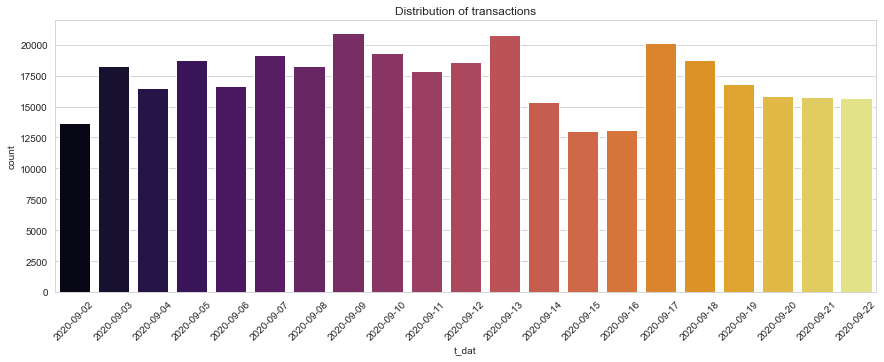

In [ ]:
# Use the "whitegrid" style for the plot
sns.set_style("whitegrid")

# Set the size of the plot
plt.figure(figsize=(50,5))

# Create a subplot
plt.subplot(1,3,1)

# Rotate the x-tick labels by 45 degrees
plt.xticks(rotation=45)

# Create a countplot using the "t_dat" column from the "transactions" dataframe
ax = sns.countplot(x="t_dat", data=transactions, palette="inferno")

# Add a title to the plot
plt.title("Distribution of transactions")

#### **Number of transactions per customer**

We want to determine how many purchases each customer has made. To do this, we will create a new dataframe with two columns: one for the customer ID and one for the number of purchases made by each customer. This dataframe will allow us to see how many purchases each customer has made.

In [ ]:
from collections import Counter
number_transactions_customer = Counter(purchase_raws['customer_id'])

In [ ]:
number_transactions_customer_df = pd.DataFrame([number_transactions_customer]).T.reset_index()
number_transactions_customer_df.columns = ['Customer ID', 'Number of Transactions']
number_transactions_customer_df.sort_values(by='Number of Transactions', ascending=False).reset_index()

,index,Customer ID,Number of Transactions
0,38291,9197,104
1,35275,36953,95
2,4445,16472,92
3,27086,13753,88
4,5953,33914,85
...,...,...,...
41248,31161,24874,1
41249,4048,11884,1
41250,12285,36144,1
41251,12292,36223,1


The customer who has made the most purchases is '9197', with a total of 104 transactions. By sorting the data in descending order, we can create a ranking of customers based on the number of purchases they have made.

In order to recommend items to users based on their similarities, we need to identify the relationships between them. One factor that may indicate a customer's likelihood to make future purchases is the number of transactions they have made. Therefore, it may be helpful to group customers according to the number of transactions they have made, in order to take into account their tendency to buy new products.

As a further analysis, we can group all customers based on the number of transactions they have made to see the distribution of these data within the entire dataset. This can give us a better understanding of how many transactions are typically made by each group of customers.

In [ ]:
boxe = [0, 3, 5, 7, 9, 11, 13]
collections = ['1-2','3-4','5-6','7-8', '9-10', '11+']
customers['Number of transactions'] = number_transactions_customer_df['Number of Transactions']
customers['transaction_group'] = pd.cut(customers['Number of transactions'], boxe, labels = collections, include_lowest=True)
customers.drop(columns=['club_member', 'age', 'fashion_news', 'age_group'])

,customer_id,Number of transactions,transaction_group
0,0,20,NaN
1,1,7,5-6
2,2,8,7-8
3,3,10,9-10
4,4,12,11+
...,...,...,...
41248,41248,6,5-6
41249,41249,6,5-6
41250,41250,6,5-6
41251,41251,8,7-8


We can create a dataframe with these results in order to plot them.

We can use these results to create a dataframe and then plot them.

In [ ]:
trans_collections_counts = customers.groupby('transaction_group').size()

In [ ]:
trans_collections_counts_df = pd.DataFrame([trans_collections_counts]).T.reset_index()
trans_collections_counts_df.columns = ['Transaction Collection', 'Number of customers']
trans_collections_counts_df

,Transaction Collection,Number of customers
0,1-2,1464
1,3-4,5116
2,5-6,14569
3,7-8,7669
4,9-10,4347
5,11+,2779


Based on the graph, it is clear that the majority of customers have purchased between 5 and 6 products, while only a small minority have purchased more than 11 products.

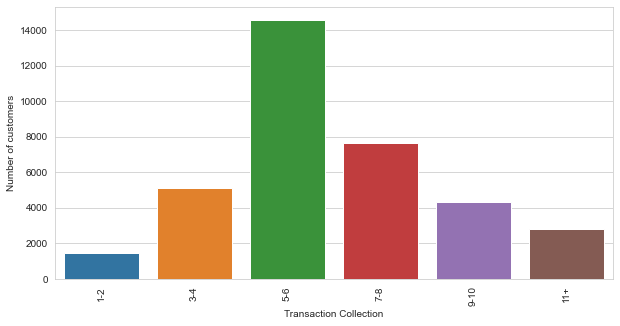

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Transaction Collection', y='Number of customers', data=trans_collections_counts_df)
plt.xticks(rotation=90)
plt.show()

#### **Number of customers that has bought each product**

It is also interesting to see everything on the other way around, so how many times each item has been bought by customers.

In [ ]:
number_of_transactions_of_article = Counter(transactions['article_id'])

In [ ]:
number_of_transactions_of_article_df = pd.DataFrame([number_of_transactions_of_article]).T.reset_index()
number_of_transactions_of_article_df.columns = ['Article ID', 'Number of Transactions']
number_of_transactions_of_article_df.sort_values(by='Number of Transactions', ascending=True)

,Article ID,Number of Transactions
3557,2049,11
3305,3353,11
1643,1758,11
4063,3603,11
5518,47,11
...,...,...
314,1429,815
1339,6166,858
63,5831,889
917,168,896


#### **ANALYSIS**

*Instead of analyzing each dataset individually, we want to take advantage of all the information we can gather by combining them.*

The above dataframe allows us to determine the most requested article. By searching for its ID in the articles dataset, we can access a wider range of information about the customers who have purchased it. This is more detailed than the analysis we previously conducted on customers, as we now have access to sensitive information that can be used for more in-depth analysis. On the other hand, the articles dataset provides us with more information that can be useful for market strategies. Let's see what article 'ID 1419' is.

In [ ]:
myarticles.loc[myarticles['article_id'] == 1419]

,article_id,prod_name,product_type,product_type_name,product_group_name,colour_group,colour_group_name,perceived_colour_value,perceived_colour_value_name,perceived_colour_master,...,department,department_name,index,index_name,index_group,index_group_name,section,section_name,garment_group,garment_group_name
1419,1419,Pluto RW slacks (1),272,Trousers,Garment Lower body,9,Black,4,Dark,5,...,1722,Trouser,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1009,Trousers


This row provides us with a lot of information. Instead of analyzing individual products, we believe it is more effective to focus on a category because it allows us to have a more accurate analysis based on a larger group of articles. This helps to avoid any outliers that might skew the results.

In [ ]:
article_type_dict = {}
article_collection_dict = {}
article_kind_dict = {}

for item ,row in myarticles.iterrows():
    article_type_dict[row['article_id']] = row['product_type_name']
    article_collection_dict[row['article_id']] = row['product_group_name']
    article_kind_dict[row['article_id']] = row['section_name']

In [ ]:
type_transactions = {}
for item,row in transactions.iterrows():
  if article_type_dict[row['article_id']] in type_transactions.keys():
    type_transactions[article_type_dict[row['article_id']]] += 1
  else:
    type_transactions[article_type_dict[row['article_id']]] = 1
        
type_transactions_df = pd.DataFrame({'Type of products':list(type_transactions.keys()),'Number of Transactions':list(type_transactions.values())})
type_transactions_df = type_transactions_df.sort_values(by='Number of Transactions', ascending = False)
type_transactions_df

,Type of products,Number of Transactions
5,Trousers,65295
11,Sweater,49602
2,Top,28308
3,Dress,26333
23,T-shirt,21010
...,...,...
68,Swimwear set,16
70,Braces,15
74,Flip flop,14
77,Heels,13


This dataframe reveals that the top-selling product category is "Trousers," which is significantly more popular than the second-highest seller. This may be due to the fact that the category of trousers includes a larger variety of articles.

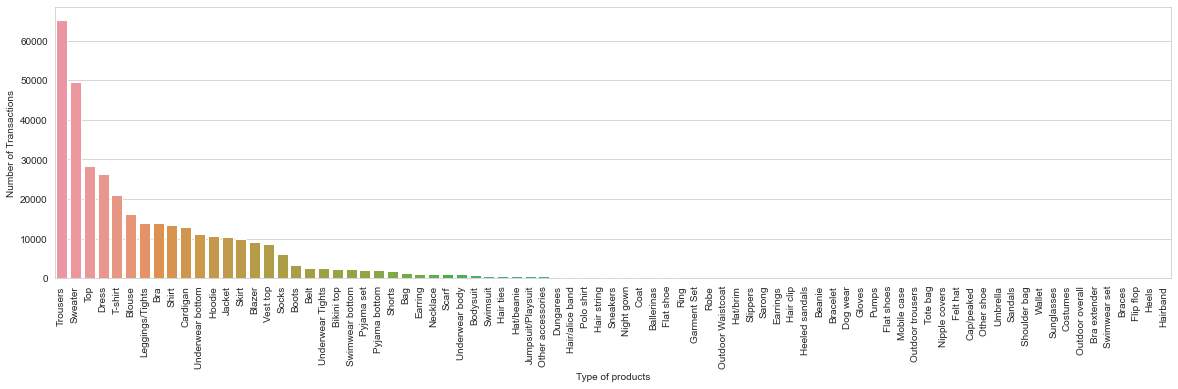

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Type of products', y='Number of Transactions', data=type_transactions_df)
plt.xticks(rotation=90)
plt.show()

Now, let's repeat the same analysis but focus on the section of articles instead.

In [ ]:
section_transactions = {}
for item,row in transactions.iterrows():
      if article_type_dict[row['article_id']] in section_transactions.keys():
        section_transactions[article_type_dict[row['article_id']]] += 1
      else:
        section_transactions[article_type_dict[row['article_id']]] = 1
        
section_transactions_df = pd.DataFrame({'Section of products':list(section_transactions.keys()),'Number of Transactions':list(section_transactions.values())})
section_transactions_df = section_transactions_df.sort_values(by='Number of Transactions', ascending = False)

We may choose to select a smaller subset of data because the ends of the graphs (the tails) are very close to zero.

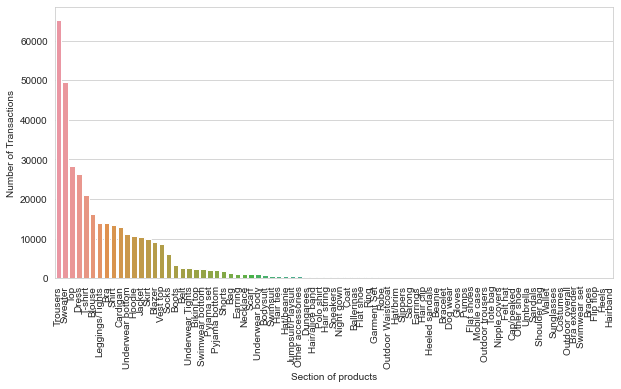

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Section of products', y='Number of Transactions', data=section_transactions_df)
plt.xticks(rotation=90)
plt.show()

We could decide to select just a smaller proportion of data because the tails of our graphs are really closed to 0.

In [ ]:
section_transactions_df_over5000 = section_transactions_df[section_transactions_df['Number of Transactions']>5000]

In [ ]:
type_transactions_df_over5000 = type_transactions_df[type_transactions_df['Number of Transactions']>5000]

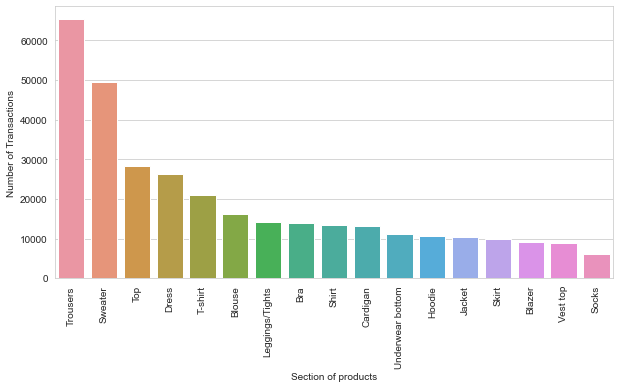

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Section of products', y='Number of Transactions', data=section_transactions_df_over5000)
plt.xticks(rotation=90)
plt.show()

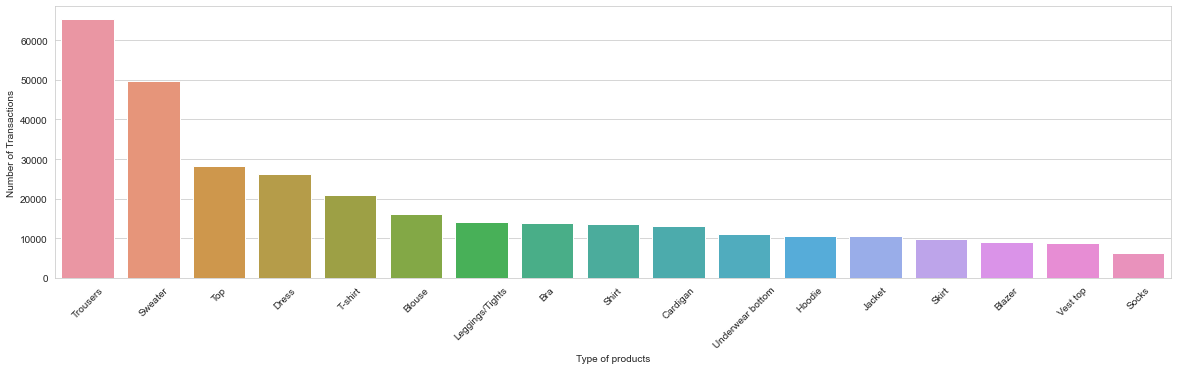

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Type of products', y='Number of Transactions', data=type_transactions_df_over5000)
plt.xticks(rotation=45)
plt.show()

# CONTENT-BASED FILTERING RECOMMENDER

Now, we can begin building the content-based filtering recommender. To do this, we need to set up our dataset so that the rows represent all the articles and the columns represent the features we are interested in.

1. we will create a table with columns for all the values in the 'perceived_colour_master_name' column, and rows for all the articles. The values in the table will be '1' if the corresponding article has the color of the respective column, and '0' otherwise. This will allow us to use the information about the colors of the articles to recommend similar items to users.

In [ ]:
#create a one hot encoding
colours = list(my_article_colour.keys())
for c in colours:
    myarticles[c] = myarticles['perceived_colour_master_name'].transform(lambda x: int(c in x))
myarticles[colours]

,Black,Blue,Grey,Beige,White,Brown,Mole,Khaki green,Red,Metal,Lilac Purple,Yellow,Pink,Green,Orange,Turquoise
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6531,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6532,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6533,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6534,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


"We repeat the process for 'section name' and 'product type name'."

In [ ]:
section_count = Counter(myarticles['section_name'])
sections = list(section_count.keys())
for s in sections:
    myarticles[s] = myarticles['section_name'].transform(lambda x: int(s in x))
myarticles[sections]

,"Womens Nightwear, Socks & Tigh",Womens Small accessories,Men H&M Sport,Womens Lingerie,Womens Everyday Basics,Womens Big accessories,Divided Basics,Girls Underwear & Basics,H&M+,Mama,...,Denim Men,Divided Asia keys,Divided Projects,Divided Accessories,Kids Girl,Young Girl,Baby Boy,Divided Complements Other,Kids Sports,Baby Girl
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6531,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6533,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6534,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
type_article_count = Counter(myarticles['product_type_name'])
types = list(type_article_count.keys())
for t in types:
    myarticles[t] = myarticles['product_type_name'].transform(lambda x: int(t in x))
myarticles[types]

,Underwear Tights,Leggings/Tights,Umbrella,Sweater,Bra,Socks,Unknown,Belt,Hair clip,Hair string,...,Wallet,Sandals,Garment Set,Outdoor Waistcoat,Heels,Other shoe,Hairband,Flat shoes,Dog wear,Bracelet
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6531,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6532,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6533,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


"The following passage combines all the information into a single dataframe."

In [ ]:
article_features = pd.concat([myarticles[colours], myarticles[sections], myarticles[types]], axis=1)
article_features.head()

,Black,Blue,Grey,Beige,White,Brown,Mole,Khaki green,Red,Metal,...,Wallet,Sandals,Garment Set,Outdoor Waistcoat,Heels,Other shoe,Hairband,Flat shoes,Dog wear,Bracelet
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


2. To build the collaborative recommendation system, we can use cosine similarity as a measure of similarity between vectors. Essentially, cosine similarity compares the angle between two vectors and the smaller the angle, the higher the degree of similarity. The cosine similarity matrix has a shape of 6536 x 6536, representing the total number of articles.

The cosine similarity matrix enables us to identify articles that are more similar to the article of interest.


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(article_features, article_features)
print(f"Dimensions of our movie features cosine similarity matrix: {cosine_sim.shape}")

Dimensions of our movie features cosine similarity matrix: (6536, 6536)


3. To provide more information about the recommended product, we need to create a dictionary that maps the product ID to its name. The ID alone is not sufficient, and having the name will make it clearer.

In [ ]:
product_dict = {}
for i,row in myarticles.iterrows():
    product_dict[row['article_id']] = {'Name': row['prod_name'], 'Color': row['colour_group_name']}

4. The following function retrieves the 10 most similar articles to the one specified by the input ID. The input is a unique article ID, and the function selects the row of the similarity matrix corresponding to that ID, sorts the elements in decreasing order, and selects the items of interest.

In [ ]:
def get_content_based_recommendations(prod_id, n:int):
    id = myarticles[myarticles['article_id'] == prod_id].index
    sin_scores = np.argsort(cosine_sim[id])[0] #returns ID sorted by the values
    sin_scores_out = list(sin_scores[::-1][1:n+1])

    if prod_id in sin_scores_out:
        sin_scores_out = list(sin_scores[::-1][1:n+2])
        sin_scores_out.remove(prod_id)
         #flip the output to get the IDs in descending order
    
    if n < 1:
        print(f"The number of suggested articles '{n}' you requested is invalid. You must request at least 1 similar product.")
        return
    
    if n == 1:
        print(f"The main recommendation for {product_dict[prod_id]['Color']} {product_dict[prod_id]['Name']} (Id: {prod_id}) is:\n")
    
    if n > 1:
        print(f"Here we can see the top {n} recommendations for {product_dict[prod_id]['Color']} {product_dict[prod_id]['Name']} (Id: {prod_id}):\n")
    
    for i in sin_scores_out:
        print(f"\n{product_dict[i]['Color']} {product_dict[i]['Name']} (Id: {i})")
    

In [ ]:
prod_id = 20
get_content_based_recommendations(prod_id,10)

Here we can see the top 10 recommendations for White 3p Sneaker Socks (Id: 20):


White Quickdry 5p shaftless (Id: 703)

White Short 5p Socks(1) (Id: 4673)

White 7p Basic Shaftless (Id: 116)

White 1p Fun Socks (Id: 2243)

White 1p Short Socks (Id: 2251)

White 1p Short Socks (Id: 2252)

White Mini Trainer 5p Socks (Id: 661)

White Sportsneaker 3p socks (Id: 69)

White 1p Shaftless (Id: 4135)

White 1p lurex socks (Id: 6506)


In [ ]:
prod_id = 2
get_content_based_recommendations(prod_id,4)

Here we can see the top 4 recommendations for Black Support 40 den 1p Tights (Id: 2):


Black PLUS Support 40 Den 1 p Tights (Id: 362)

Black Control Lt 40 den 2p Tights (Id: 288)

Black Mama Support 100 den (Id: 267)

Black Control Top 15 den 1p Tights (Id: 191)


# USER-BASED FILTERING RECOMMENDER

The second recommendation method we will use is user-based. User similarity is an important feature in markets and can be used to suggest articles based on potential connections between users.

1. Here, we create a new dataframe containing all the purchases made by each customer.

In [ ]:
ua_transactions = transactions.groupby(['customer_id', 'article_id']).count().reset_index()
ua_transactions.columns = ['customer_id', 'article_id', 'transactions']
ua_transactions

,customer_id,article_id,transactions
0,0,463,1
1,0,5571,1
2,0,6120,1
3,0,6440,1
4,1,617,1
...,...,...,...
301932,41252,350,1
301933,41252,1184,1
301934,41252,1340,1
301935,41252,1974,1


2. We will now construct a 'utility' matrix with customer IDs as column indices and article IDs as row indices.



In [ ]:
N = ua_transactions['customer_id'].nunique() #41246
M = ua_transactions['article_id'].nunique() #6469

In [ ]:
article_mapper = dict(zip(np.unique(ua_transactions["article_id"]), list(range(M))))
article_inv_mapper = dict(zip(list(range(M)), np.unique(ua_transactions["article_id"])))

article_index = [article_mapper[i] for i in ua_transactions['article_id']] #301937

In [ ]:
customer_mapper = dict(zip(np.unique(ua_transactions["customer_id"]), list(range(N))))
customer_inv_mapper = dict(zip(list(range(N)), np.unique(ua_transactions["customer_id"])))

customer_index = [customer_mapper[i] for i in ua_transactions['customer_id']]

The code utilizes dictionaries to associate the rows and columns of the 'utility' matrix with their corresponding article IDs. The 'article_mapper' dictionary maps an article ID to its index, while the 'article_inv_mapper' dictionary does the opposite, mapping an index to its corresponding article ID.

In [ ]:
from scipy.sparse import csr_matrix

X = csr_matrix((ua_transactions["transactions"], (article_index, customer_index)), shape=(M, N))

In [ ]:
X

<6469x41246 sparse matrix of type '<class 'numpy.int64'>'
	with 301937 stored elements in Compressed Sparse Row format>

3. To verify the integrity of the matrix, we need to calculate its sparsity.

In [ ]:
sparsity = X.count_nonzero()/(X.shape[0]*X.shape[1])
print(f"Matrix sparsity: {round(sparsity*100,3)}%")

Matrix sparsity: 0.113%


The sparsity of our matrix has a low value, as expected. It is generally desirable for the percentage to be no lower than 0.5%.

4. We are going to ignore some customers in order to increase the sparsity of our matrix and improve our model. These customers are those who have purchased a small number of items because their columns in the matrix will have many zeros. Additionally, people who purchase fewer items are not motivated to buy more products.

To begin, we create a new dataframe that only includes transactions from customers who have made more than a certain number of transactions (denoted by q). It's important to note that the sparsity of the matrix will be affected by the value chosen for q.

keep in mind that reducing the number of customers will result in the loss of a significant amount of information, which could lead to incorrect interpretations. It is important to find a balance between increasing sparsity and preserving as much information as possible.

In [ ]:
customer_transactions_number_df2 = number_transactions_customer_df[number_transactions_customer_df['Number of Transactions'] > 27]

In [ ]:
customer_list = list(customer_transactions_number_df2['Customer ID']) #outputs a list with all the IDs of the customers with more than q transactions

In [ ]:
ua_transactions_overq = ua_transactions.query('customer_id in @customer_list') #dataframe that contains customer_id, article_id and number 
                                                                            #of transactions of the people who have done more than q transactions

Just as before, we can now start constructing the main elements of our new matrix.


In [ ]:
N2 = ua_transactions_overq['customer_id'].nunique() #number of unique customers in the new dataframe
M2 = ua_transactions_overq['article_id'].nunique() #number of unique articles in the new dataframe

Before creating our matrix, we need to rescale the indexes of both the items and the customers. Since we have removed some customers and items, we need to use a new mapper to rescale the indexes. This is necessary because we have lost some customers and a small number of items.

In [ ]:
article_mapper2 = dict(zip(np.unique(ua_transactions_overq['article_id']), list(range(M2))))
article_inv_mapper2 = dict(zip(list(range(M2)), np.unique(ua_transactions_overq['article_id'])))

article_index2 = [article_mapper2[i] for i in ua_transactions_overq['article_id']] #new indexes for all the articles

In [ ]:
customer_mapper2 = dict(zip(np.unique(ua_transactions_overq['customer_id']), list(range(N2))))
customer_inv_mapper2 = dict(zip(list(range(N2)), np.unique(ua_transactions_overq['customer_id'])))

customer_index2 = [customer_mapper2[i] for i in ua_transactions_overq['customer_id']] #new indexes for all the customers

We are now ready to create the new matrix X2, which will have all customers who have made more than q transactions as columns and items as rows. The values in the matrix will correspond to transactions made by a customer to purchase a particular product.

In [ ]:
X2 = csr_matrix((ua_transactions_overq["transactions"], (article_index2, customer_index2)), shape=(M2, N2))

In [ ]:
sparsity2 = X2.count_nonzero()/(X2.shape[0]*X2.shape[1])
print(f"Matrix sparsity: {round(sparsity2*100,4)}%")

Matrix sparsity: 0.5799%


The latter value represents the highest sparsity we can achieve. We have decided to stop reducing the matrix because further reduction would result in a biased recommendation system. We are aware that this algorithm may not be ideal for our data because the matrix is very sparse. We also exclude all customers who have fewer than 27 transactions. Increasing this number would result in a dataset that is too small.

5. Now, we can begin constructing our recommendation algorithm using the KNN algorithm. We are working in an M-dimensional space, where M is the number of items in our X matrix.

This function finds the k-nearest neighbors for a given item ID and returns a list of k similar item IDs.

The inputs are:

article_id: the ID of the article of interest
X: the user-item utility matrix we have created
k: the number of similar articles to be retrieved
metric: the distance metric for kNN calculations (in our case, cosine similarity)

In [ ]:
from sklearn.neighbors import NearestNeighbors

def find_similar_articles(article_id, X, k:int, metric):
    neighbour_ids = []
    article_ind = article_mapper[article_id]
    article_vec = X[article_ind]
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(article_vec, return_distance=False)[0]
    neighbour_ids = [article_inv_mapper[n] for n in neighbour[1:]]
    
    if k < 1:
        print(f"The number of articles to be suggested '{k}' you asked is meaningless, you have to ask for at least 1 similar product.")
        return
    
    if k == 1:
        print(f"\nSince you bought '{product_dict[article_id]['Color']} {product_dict[article_id]['Name']}' (Id: {article_id}), a product that you could like is:\n")
    
    if k > 1:
        print(f"\nSince you bought '{product_dict[article_id]['Color']} {product_dict[article_id]['Name']}' (Id: {article_id}), the {k} products that you could like are:\n")
    
    for i in neighbour_ids:
        print(f"{product_dict[i]['Color']} {product_dict[i]['Name']} (Id: {i})\n")
    
    return

In [ ]:
article_id = 10

similar_ids = find_similar_articles(article_id, X2, 0, metric='cosine')

The number of articles to be suggested '0' you asked is meaningless, you have to ask for at least 1 similar product.


In [ ]:
similar_ids2 = find_similar_articles(article_id, X2, k=10, metric='euclidean')


Since you bought 'Black OP Strapless^' (Id: 10), the 10 products that you could like are:

White TD Hugo slim fit Stretch PQ (Id: 128)

Light Pink Maja Cardigan TVP (Id: 818)

Greenish Khaki RONNY REG RN T-SHIRT (Id: 891)

Light Purple Class Ziggy hoop (Id: 900)

Black Florida skirt (Id: 3161)

Black Sammy dress (Id: 3643)

Black 1pk Fun (Id: 1868)

Black Push it Push Bra. (Id: 3644)

Yellowish Brown Wisdom Cut Out Bra (Id: 3159)

Dark Turquoise Florida skirt (Id: 3165)



Even though we were able to achieve a sparsity of almost 0.6%, our model may not be highly reliable because our sparsity is not very high. However, we can see that the results of this user-based model differ from those of the content-based model. In this system, the color of the initial product (which represents a physical similarity) does not seem to be as important, as many of the suggested clothes are not the same color as the initial product.

# NEURAL NETWORK

 We will enhance our user recommendation system by utilizing neural networks and matrix factorization techniques.

 We will enhance our user recommendation system by utilizing neural networks and matrix factorization techniques. These techniques will allow us to identify latent features that describe user preferences and item characteristics, which can then be used to make personalized recommendations to users. We believe that using neural networks and matrix factorization will provide a number of benefits, such as the ability to handle large datasets, handle missing data, and incorporate additional information into the recommendation process. For example, if two items have similar latent features, they may be recommended to the same user, even if the user has never explicitly rated those items.

In [ ]:
import tensorflow as tf

In [ ]:
ua_transactions['customer_id'] = ua_transactions['customer_id'].map(customer_mapper).astype(int)
ua_transactions['article_id'] = ua_transactions['article_id'].map(article_mapper).astype(int)
myarticles2['article_id'] = myarticles2['article_id'].map(article_mapper).astype(int)

indices = ua_transactions[['customer_id', 'article_id']].values
values = ua_transactions['transactions'].values

A = tf.SparseTensor(
        indices=indices,
        values=values,
        dense_shape=[N, M])

C:\Users\Carlo\AppData\Local\Temp\ipykernel_21380\3686888355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myarticles2['article_id'] = myarticles2['article_id'].map(article_mapper).astype(int)


### LOSS FUNCTION

 The loss function for this recommender system can be written as follows:
 Loss = MSE + λr * l2_regularization + λg * gravity_term
where MSE is the mean squared error between the true transactions and the model's predictions, l2_regularization is the l2 regularization term for the model parameters (C and V), and gravity_term is the gravity term that helps prevent the model from overfitting to irrelevant transactions. The regularization coefficients λr and λg are hyperparameters that you can tune to achieve the best performance for your model.

 The MSE term measures the approximation error of the model's predictions and can be calculated as follows:

MSE = ∑(A_ij - C_i * V_j)^2
where A_ij is the true transaction for customer i and article j, and C_i and V_j are the embeddings for customer i and article j, respectively.

 The l2 regularization term is used to prevent overfitting by adding a penalty to the loss function based on the magnitude of the model parameters. It is calculated as follows:

 l2_regularization = ∑(C_i^2 + V_j^2)

The gravity term is used to push the prediction of any pair (i, j) towards zero and can be calculated as follows:

gravity_term = ∑(C_i * V_j)^2

The combination of the MSE term, l2 regularization, and gravity term helps the model make more accurate predictions while also preventing overfitting to irrelevant transactions.

In [ ]:
def loss_function(sparse_transactions, C, V, lambdar, lambdag):
    predictions = tf.reduce_sum(
    tf.gather(C, sparse_transactions.indices[:, 0]) *
    tf.gather(V, sparse_transactions.indices[:, 1]),
    axis=1)
    
    M_S_E = tf.losses.mean_squared_error(sparse_transactions.values, predictions)


    loss_two = (tf.reduce_sum(C*C)/C.shape[0] + 
                            tf.reduce_sum(V*V)/V.shape[0])
    
    gravity =  1. / (C.shape[0]*V.shape[0]) * tf.reduce_sum(
        tf.matmul(C, C, transpose_a=True) * tf.matmul(V, V, transpose_a=True))


    return M_S_E + lambdar * loss_two + lambdag * gravity


This loss function calculates the MSE between the true transactions and the model's predictions, as well as the l2 regularization and gravity terms. It then multiplies each of these terms by their corresponding regularization coefficients (lambdar and lambdag) before returning the sum of these three terms, which is the total loss.

In [ ]:
def divide_dataframe(df, holdout_fraction=0.25):
    test = df.sample(frac=holdout_fraction, replace=False)
    train = df[~df.index.isin(test.index)]
    return train, test

Here we split the data into test and train sets.

In [ ]:
def sparse_tensor_builder(t):
    N = t['customer_id'].max() + 1
    M = t['article_id'].max() + 1
    indices = t[['customer_id', 'article_id']].values
    values = t['transactions'].values
    return tf.SparseTensor(
        indices=indices,
        values=values,
        dense_shape=[N, M])

Here we build a matrix with the transactions. We used the tf.sparse.reorder function which sorts the indices of the sparse tensor in increasing order of the row indices and then, within each row, by increasing order of the column indices. This can be helpful for certain operations that are more efficient when the indices are sorted in this way.

In [ ]:
train_transaction, test_transaction = divide_dataframe(ua_transactions)

a_train = sparse_tensor_builder(train_transaction)
a_test = sparse_tensor_builder(test_transaction)

C = tf.Variable(tf.random.normal(
    [a_train.dense_shape[0], 10], stddev=.1))
V = tf.Variable(tf.random.normal(
    [a_train.dense_shape[1], 10], stddev=.1))

In [ ]:
trainable_weights = [C, V]
optimizer = tf.optimizers.Adam(learning_rate=0.5)

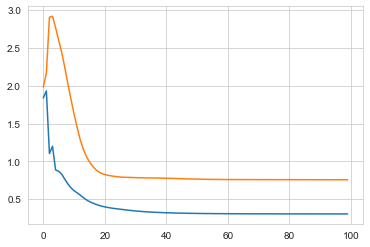

In [ ]:
training_losses = []
test_losses = []
for step in range(100):
    with tf.GradientTape() as tape:
        loss = loss_function(a_train, C, V, lambdar=0.1, lambdag=0.001)
    grads = tape.gradient(loss, trainable_weights)
    optimizer.apply_gradients(zip(grads, trainable_weights))
    training_losses.append(loss)
    test_losses.append(loss_function(a_test, C, V, lambdar=0.1, lambdag=0.001))
    #lambda r is the coefficient that regulates the l2 regularization
    #lambda g is the coefficient that mangaes the gravity term
    
plt.plot(training_losses)
plt.plot(test_losses) 

In this code, we split the training set into mini-batches and use each mini-batch to compute the gradient of the loss function. We then update the model weights using the optimizer. We repeat this process for a fixed number of epochs.

The following function computes the scores of candidates given a query. The inputs of the function are:

query_embedding: a vector of shape [k], representing the query embedding.
item_embeddings: a matrix of shape [N, k], such that row i is the embedding of item i.
measure: a string specifying the similarity measure to be used (dot, cosine).
The function outputs a vector of shape N, such that scores[i] is the score of item i.

In [ ]:
def score_results(query_embedding, item_embeddings, measure='dot'):
    c = query_embedding
    V = item_embeddings
    if measure == 'cosine':
        V = V / np.linalg.norm(V, axis=1, keepdims=True)
        c = c / np.linalg.norm(c)
    scores = tf.experimental.numpy.dot(c, V.numpy().transpose())
    return scores

In [ ]:
def customer_advices(C,V,id, measure, k: int, exclude_rated=True):
    scores = score_results(C[id], V, measure)
    score_key = measure + 'score'
    df = pd.DataFrame({
        score_key: list(scores.numpy()),
        'article_id': myarticles2['article_id'],
        'prod_name': myarticles2['prod_name'],
    })
    if exclude_rated:       # here we remove articles that are already bought
      bought_articles = ua_transactions[ua_transactions.customer_id == id]["article_id"].values
      df = df[df.article_id.apply(lambda article_id: article_id not in bought_articles)]
    final_result = df.sort_values([score_key], ascending=False).head(k)  
    
    already_bought = ua_transactions[ua_transactions['customer_id'] == id]
    already_bought_list = list(already_bought['article_id'])
    
    print(f"advices for customer: {id}:\n")
    print(f"The user {id} already bought:")
    
    for i in already_bought_list:
        print(f"\n{product_dict[i]['Color']} {product_dict[i]['Name']} (Id: {i})")
    print("\n\n")
    
    final_result_list = list(final_result['article_id'])
    
    if k < 1:
        print(f"The number of articles to be suggested, '{k}', is invalid. You must request at least one similar product.")
        return

    if k == 1:
        print("The most recommended article for the user is:")
    else:
        print(f"The most recommended {k} articles for the user are:")
    
    for i in final_result_list:
        print(f"\n{product_dict[i]['Color']} {product_dict[i]['Name']} (Id: {i})")
    
    return 

In [ ]:
n_products = 5
customer_advices(C,V,20, measure = 'dot', k = n_products)

advices for customer: 20:

The user 20 already bought:

Dark Beige Hat Frank Fedora(1) (Id: 126)

Black KATE PQ ballerina (Id: 492)

Black Charlotte Unpadded Wire (Id: 989)

Black Evie padded softbra 2p (Id: 1327)

Dark Green Manchester dress (Id: 3376)

Beige Calypso brazilian V-shape (Id: 4348)

Black Great Dane slim trouser (Id: 4523)

Black Nancy rib LS (Id: 6293)



The most recommended 5 articles for the user are:

Black ED Gigi HW shorts (Id: 3105)

Beige Box 4p Kneehighs (Id: 15)

Black Perrie Slim Mom Denim TRS (Id: 167)

Black 200 den 1p leggings (Id: 8)

Light Beige PQ HAMPTON WOOL POLO (Id: 5483)


In [ ]:
number_of_products = 5
customer_advices(C,V,20,measure = 'cosine',k = n_products)

advices for customer: 20:

The user 20 already bought:

Dark Beige Hat Frank Fedora(1) (Id: 126)

Black KATE PQ ballerina (Id: 492)

Black Charlotte Unpadded Wire (Id: 989)

Black Evie padded softbra 2p (Id: 1327)

Dark Green Manchester dress (Id: 3376)

Beige Calypso brazilian V-shape (Id: 4348)

Black Great Dane slim trouser (Id: 4523)

Black Nancy rib LS (Id: 6293)



The most recommended 5 articles for the user are:

Light Yellow Claudine (Id: 1775)

Other Purple Beata aliceband (Id: 1162)

Grey Maltese FUP (Id: 4007)

Greenish Khaki Stature skinny cargo pant (Id: 1696)

White SPEED Ellinor top (Id: 4377)
